<a href="https://colab.research.google.com/github/tantanbei/deep-learning/blob/main/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E9%97%AE%E9%A2%98TensorFlow%E5%AE%9E%E6%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

np.random.seed(5)

In [ ]:
# 直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间

x_data = np.linspace(-1, 1, 100)

# y = 2x + 1 + 噪声， 其中，噪声的维度与x_data一致
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4

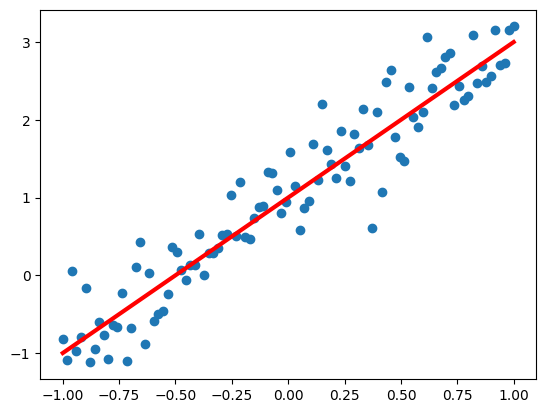

In [ ]:
#画出随机生成数据的散点图
plt.scatter(x_data, y_data)

#画出我们想要学习到的线性函数 y = 2x + 1
plt.plot(x_data, 2 * x_data + 1.0, color = 'red', linewidth = 3)

In [ ]:
# 构建模型

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None])
y = tf.placeholder(tf.float32, [None])
print(x)
print(y)

w = tf.get_variable('w', [1], initializer=tf.constant_initializer(1.0))
b = tf.get_variable('b', [1], initializer=tf.constant_initializer(0.0))
print(w)
print(b)


y_ = w * x + b

#p_y_1 = tf.nn.sigmoid(y_)
#print(p_y_1)

#y_reshaped = tf.reshape(y, (-1, 1))
loss = tf.reduce_mean(tf.square(y - y_))

# 定义梯度下降的方法
with tf.name_scope('train_op'):
    train_op = tf.train.AdamOptimizer(1e-2).minimize(loss)    # 最小化loss，到这里，计算图构建完成


#训练
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(10):
      #batch_data = []
      #batch_labels = []
      for xs, ys in zip(x_data, y_data):
        w0, b0, loss0, _ = sess.run([w, b, loss,  train_op], feed_dict={x: xs.reshape(1,), y: ys.reshape(1,)})

      print('[Train] Step: %d, w: %4.5f, b: %4.5f, loss: %4.5f' % (i, w0[0], b0[0], loss0))

    y_p = sess.run(y_, feed_dict={x: [3.21]})
    print('预估值: %4.5f, 真实值: %4.5f' % (y_p[0], 3.21 * 2 +1))

Tensor("Placeholder:0", shape=(?,), dtype=float32)
Tensor("Placeholder_1:0", shape=(?,), dtype=float32)
<tf.Variable 'w:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'b:0' shape=(1,) dtype=float32_ref>
[Train] Step: 0, w: 1.25020, b: 0.91242, loss: 1.13494
[Train] Step: 1, w: 1.69803, b: 1.06250, loss: 0.20207
[Train] Step: 2, w: 1.90683, b: 1.05803, loss: 0.05631
[Train] Step: 3, w: 1.97528, b: 1.04452, loss: 0.03231
[Train] Step: 4, w: 1.99073, b: 1.04009, loss: 0.02824
[Train] Step: 5, w: 1.99275, b: 1.03932, loss: 0.02777
[Train] Step: 6, w: 1.99239, b: 1.03932, loss: 0.02786
[Train] Step: 7, w: 1.99181, b: 1.03942, loss: 0.02801
[Train] Step: 8, w: 1.99128, b: 1.03951, loss: 0.02814
[Train] Step: 9, w: 1.99083, b: 1.03960, loss: 0.02825
预估值: 7.43018, 真实值: 7.42000


In [ ]:
# 构建模型

tf.reset_default_graph()

x = tf.placeholder("float", name="x")
y = tf.placeholder("float", name="y")
print(x)
print(y)

w = tf.Variable(0.0, name='w0')
b = tf.Variable(0.0, name='b0')
print(w)
print(b)


y_ = w * x + b

#p_y_1 = tf.nn.sigmoid(y_)
#print(p_y_1)

#y_reshaped = tf.reshape(y, (-1, 1))
loss = tf.reduce_mean(tf.square(y - y_))

# 定义梯度下降的方法
with tf.name_scope('train_op'):
    train_op = tf.train.AdamOptimizer(1e-2).minimize(loss)    # 最小化loss，到这里，计算图构建完成


#训练
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(10):
      #batch_data = []
      #batch_labels = []
      for xs, ys in zip(x_data, y_data):
      #batch_data = tf.cast(tf.convert_to_tensor(x_data[i]), tf.float32)
      #batch_labels = tf.cast(tf.convert_to_tensor(y_data[i]), tf.float32)
      #print(batch_data.shape)
      #print(batch_labels.shape)
        #batch_data.append(xs)
        #batch_data.append(ys)
        #print('[Train] Step: %d start' % (i))
        #print(xs, ys)
        w0, b0, loss0, _ = sess.run([w, b, loss,  train_op], feed_dict={x: xs, y: ys})

      print('[Train] Step: %d, w: %4.5f, b: %4.5f, loss: %4.5f' % (i, w0, b0, loss0))

    y_p = sess.run(y_, feed_dict={x: 3.21})
    print('预估值: %4.5f, 真实值: %4.5f' % (y_p, 3.21 * 2 +1))

Tensor("x:0", dtype=float32)
Tensor("y:0", dtype=float32)
<tf.Variable 'w0:0' shape=() dtype=float32_ref>
<tf.Variable 'b0:0' shape=() dtype=float32_ref>
[Train] Step: 0, w: 0.63836, b: 0.64804, loss: 3.78552
[Train] Step: 1, w: 1.18400, b: 0.95968, loss: 1.15767
[Train] Step: 2, w: 1.56338, b: 1.05579, loss: 0.34961
[Train] Step: 3, w: 1.79498, b: 1.06500, loss: 0.11880
[Train] Step: 4, w: 1.91535, b: 1.05408, loss: 0.05386
[Train] Step: 5, w: 1.96833, b: 1.04516, loss: 0.03478
[Train] Step: 6, w: 1.98804, b: 1.04089, loss: 0.02904
[Train] Step: 7, w: 1.99404, b: 1.03936, loss: 0.02744
[Train] Step: 8, w: 1.99527, b: 1.03896, loss: 0.02713
[Train] Step: 9, w: 1.99509, b: 1.03895, loss: 0.02717
预估值: 7.44317, 真实值: 7.42000


Tensor("x:0", dtype=float32)
Tensor("y:0", dtype=float32)
<tf.Variable 'w0:0' shape=() dtype=float32_ref>
<tf.Variable 'b0:0' shape=() dtype=float32_ref>
Train finish, w: 1.98230, b: 1.04201
预估值: 7.40518, 真实值: 7.42000


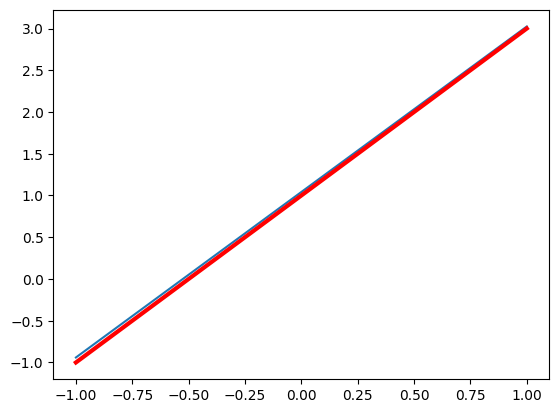

In [ ]:
# 构建模型

tf.reset_default_graph()

x = tf.placeholder("float", name="x")
y = tf.placeholder("float", name="y")
print(x)
print(y)

def model(x, w, b):
  return tf.multiply(x, w) + b

w = tf.Variable(1.0, name='w0')
b = tf.Variable(0.0, name='b0')
print(w)
print(b)

pred = model(x, w, b)

loss_function = tf.reduce_mean(tf.square(y-pred))
optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss_function)

#训练
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(10):
  for xs, ys in zip(x_data, y_data):
    _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y: ys})

b0temp=b.eval(session=sess)
w0temp=w.eval(session=sess)
print("Train finish, w: %4.5f, b: %4.5f" % (w0temp, b0temp))

#画出训练结果的曲线
plt.plot(x_data, w0temp * x_data + b0temp)

#画出我们想要学习到的线性函数 y = 2x + 1
plt.plot(x_data, 2 * x_data + 1.0, color = 'red', linewidth = 3)

y_p = sess.run(pred, feed_dict={x: [3.21]})
print('预估值: %4.5f, 真实值: %4.5f' % (y_p[0], 3.21 * 2 +1))

sess.close()